In [1]:
%run "../head.py"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from lib.metrics import stack_contour
from lib.plot import plot_figure, plot_figure_canvas

In [3]:
batches = [
    "Sperm"
]

arg_bfs_lr_ft_files = { # full thickness
    batch : (h.ddir / batch).with_suffix(".lr_ft.bfs.pkl")
    for batch in batches
}

arg_bfs_dv_ft_files = {
    batch : (h.ddir / batch).with_suffix(".dv_ft.bfs.pkl")
    for batch in batches
}

### Show contour by occupancy.

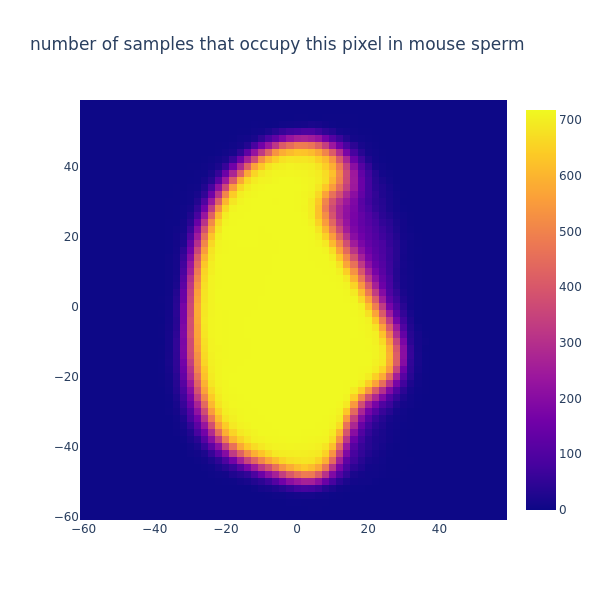

In [10]:
batch = "Sperm"

bfs = pd.read_pickle(arg_bfs_lr_ft_files[batch])
#bfs["density"].clip(upper=1).sum(axis=1).quantile(0.65)

data = bfs["density"].clip(upper=1).sum(axis=1)
fig = plot_figure_canvas(
    data.unstack(),
    square_size=60,
    step=2,
    fill=0
    )
fig.update_layout(
    title = "number of samples that occupy this pixel in mouse sperm",
    height = 600,
    width = 600
)
fig.show(renderer= "png")

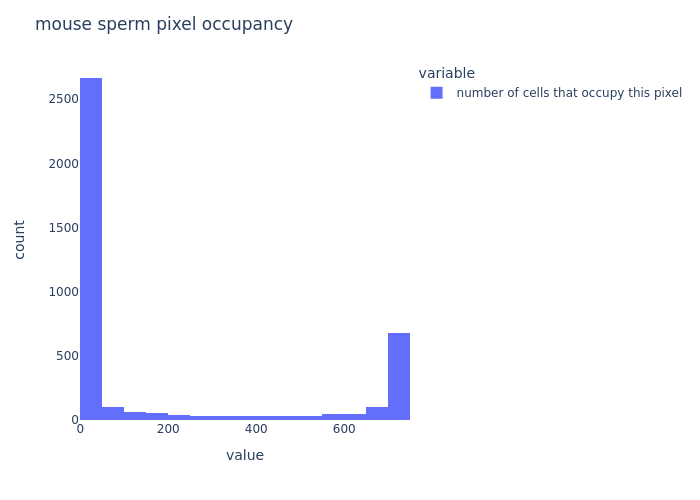

In [11]:
data = bfs["density"].clip(upper=1).sum(axis=1)
data.name = "number of cells that occupy this pixel"
fig = px.histogram(data)
fig.update_layout(
    height = 500,
    width = 700,
    title = "mouse sperm pixel occupancy",
    plot_bgcolor = "white",
)
fig.show(renderer= "png")

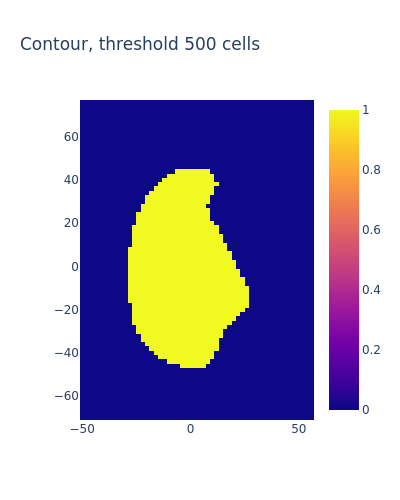

In [14]:
if h.version == "0":
    threshold = 0.8
    cell_events = bfs["density"].clip(upper=1).sum(axis=1)
    t_num = cell_events.quantile(threshold)
elif h.version in ["1","2"]:
    cell_events = bfs["density"].clip(upper=1).sum(axis=1)
    t_num = 500
else:
    raise NotImplementedError(f"version {h.version} not implemented")
contour = pd.Series(0, bfs["density"].index)
contour[cell_events < t_num] = 0
contour[cell_events >= t_num] = 1
contour = contour.astype("bool")
#threshold = 50
#contour = bfs["density"].mean(axis=1).copy()
#contour[bfs["density"].mean(axis=1) < threshold] = 0
#contour[bfs["density"].mean(axis=1) >= threshold] = 1

data = contour.unstack().astype("int")
fig = plot_figure(
    data
)
if h.version == "0":
    fig.update_layout(
        title = "Contour, threshold %.1f (%d%%)" % (t_num, threshold*100)
    )
elif h.version in ["1","2"]:
    fig.update_layout(
        title = "Contour, threshold %d cells" % t_num
    )
else:
    raise NotImplementedError(f"version {h.version} not implemented")
fig.show(renderer= "png")

In [15]:
contour.to_pickle(f"{batch}.lr_contour.v{h.version}.pkl")

ht-dv view

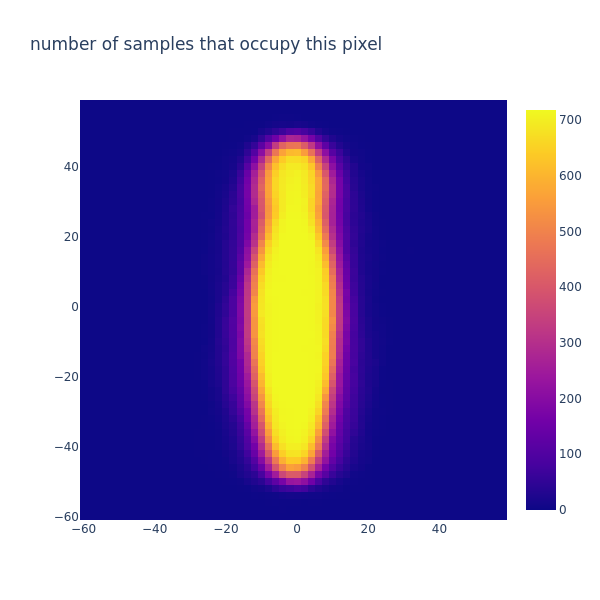

In [16]:
batch = "Sperm"

bfs = pd.read_pickle(arg_bfs_dv_ft_files[batch])
#bfs["density"].clip(upper=1).sum(axis=1).quantile(0.65)

data = bfs["density"].clip(upper=1).sum(axis=1)
fig = plot_figure_canvas(
    data.unstack(),
    square_size=60,
    step=2,
    fill=0,
    )
fig.update_layout(
    title = "number of samples that occupy this pixel",
    height = 600,
    width = 600
)
fig.show(renderer= "png")

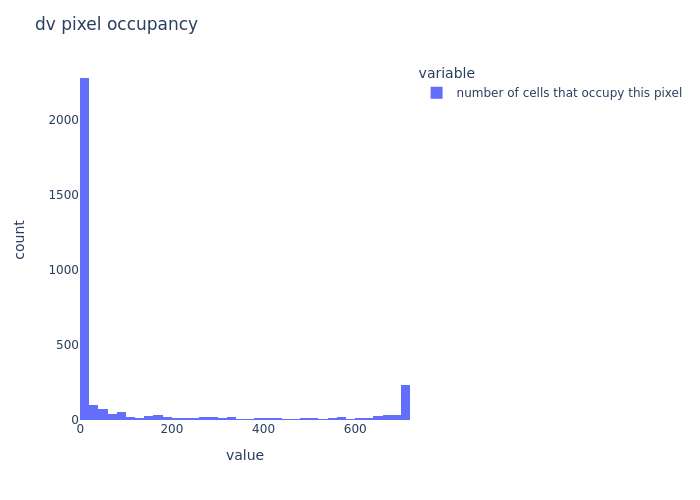

In [17]:
data = bfs["density"].clip(upper=1).sum(axis=1)
data.name = "number of cells that occupy this pixel"
fig = px.histogram(data)
fig.update_layout(
    height = 500,
    width = 700,
    title = "dv pixel occupancy",
    plot_bgcolor = "white",
)
fig.show(renderer= "png")

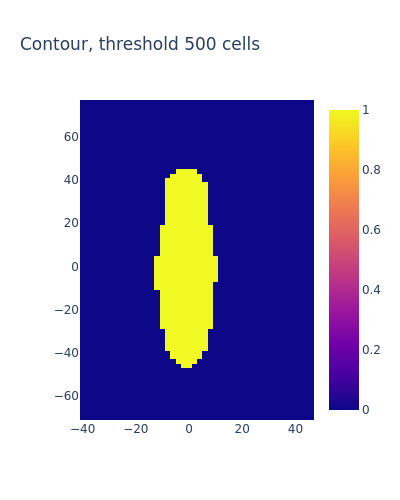

In [18]:
if h.version == "0":
    threshold = 0.85
    cell_events = bfs["density"].clip(upper=1).sum(axis=1)
    t_num = cell_events.quantile(threshold)
elif h.version in ["1","2"]:
    cell_events = bfs["density"].clip(upper=1).sum(axis=1)
    t_num = 500
else:
    raise NotImplementedError(f"version {h.version} not implemented")
contour = pd.Series(0, bfs["density"].index)
contour[cell_events < t_num] = 0
contour[cell_events >= t_num] = 1
contour = contour.astype("bool")

data = contour.unstack().astype("int")
fig = plot_figure(
    data
)
if h.version == "0":
    fig.update_layout(
        title = "Contour, threshold %.1f (%d%%)" % (t_num, threshold*100)
    )
elif h.version in ["1","2"]:
    fig.update_layout(
        title = "Contour, threshold %d cells" % t_num
    )
else:
    raise NotImplementedError(f"version {h.version} not implemented")
fig.show(renderer= "png")

In [19]:
contour.to_pickle(f"{batch}.dv_contour.v{h.version}.pkl")

### direct contour method of lr

In [4]:
batch = "Sperm"

bfs = pd.read_pickle(arg_bfs_lr_ft_files[batch])
silhoutte = bfs["density"].clip(upper=1).fillna(0)
silhoutte_contour = silhoutte.apply(stack_contour, axis=0)

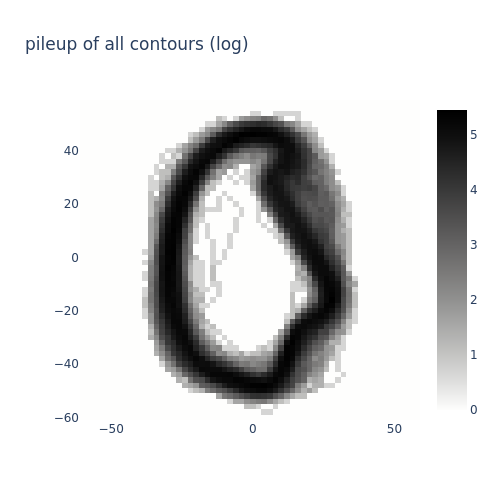

In [21]:
fig = plot_figure_canvas(
   np.log1p(silhoutte_contour.sum(axis=1).unstack()),
square_size=60,
   fill=0,
   cmap="gray_r"
)
fig.update_layout(
    title = "pileup of all contours (log)"
)
fig.show(renderer= "png")

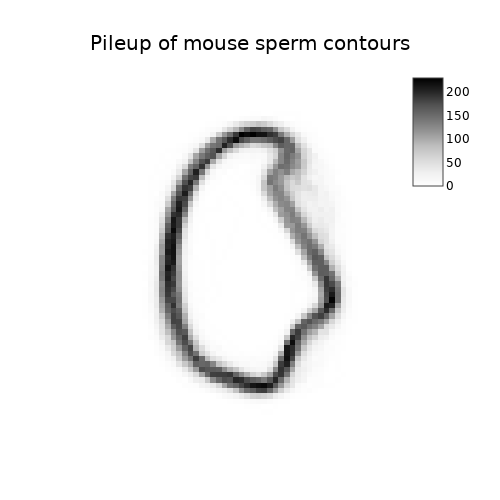

In [6]:
fig = plot_figure_canvas(
   silhoutte_contour.sum(axis=1).unstack(),
    square_size=60,
   fill=0,
   cmap="Greys",
   **h.template.layout.coloraxis.to_plotly_json()
)
fig.update_layout(
    template = h.template,
    title = "Pileup of mouse sperm contours"
)
fig.show(renderer= "png")

### direct contour method of dv

In [7]:
batch = "Sperm"

bfs = pd.read_pickle(arg_bfs_dv_ft_files[batch])
silhoutte = bfs["density"].clip(upper=1).fillna(0)
silhoutte_contour = silhoutte.apply(stack_contour, axis=0)

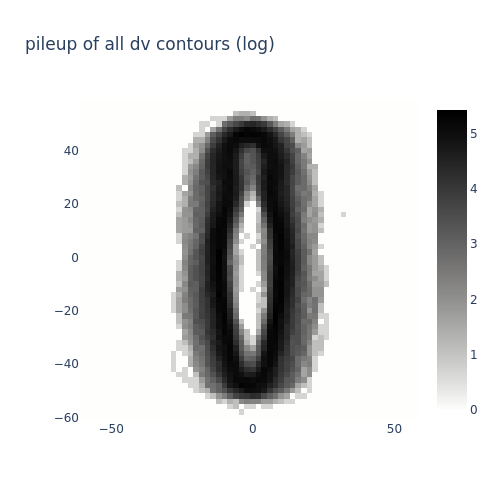

In [24]:
fig = plot_figure_canvas(
   np.log1p(silhoutte_contour.sum(axis=1).unstack()),
square_size=60,
   fill=0,
   cmap="gray_r"
)
fig.update_layout(
    title = "pileup of all dv contours (log)"
)
fig.show(renderer= "png")

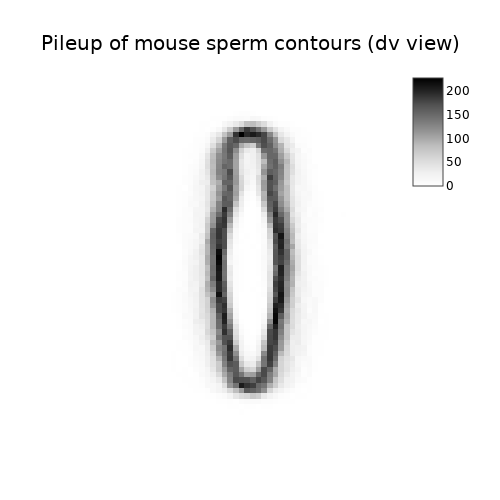

In [8]:
fig = plot_figure_canvas(
   silhoutte_contour.sum(axis=1).unstack(),
square_size=60,
   fill=0,
   cmap="Greys",
    **h.template.layout.coloraxis.to_plotly_json()
)
fig.update_layout(
    template = h.template,
    title = "Pileup of mouse sperm contours (dv view)"
)
fig.show(renderer= "png")

### whole thickness density

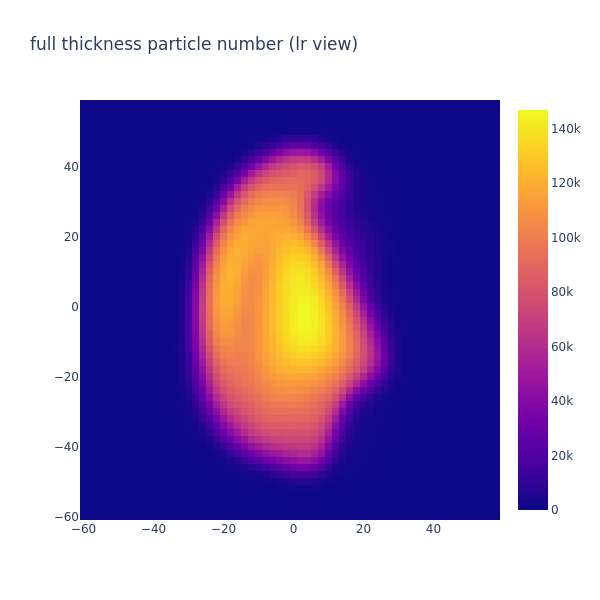

In [26]:
batch = "Sperm"

bfs = pd.read_pickle(arg_bfs_lr_ft_files[batch])
#bfs["density"].clip(upper=1).sum(axis=1).quantile(0.65)

data = bfs["density"].sum(axis=1)
fig = plot_figure_canvas(
    data.unstack(),
    square_size=60,
    step=2,
    fill=0
    )
fig.update_layout(
    title = "full thickness particle number (lr view)",
    height = 600,
    width = 600
)
fig.show(renderer= "png")

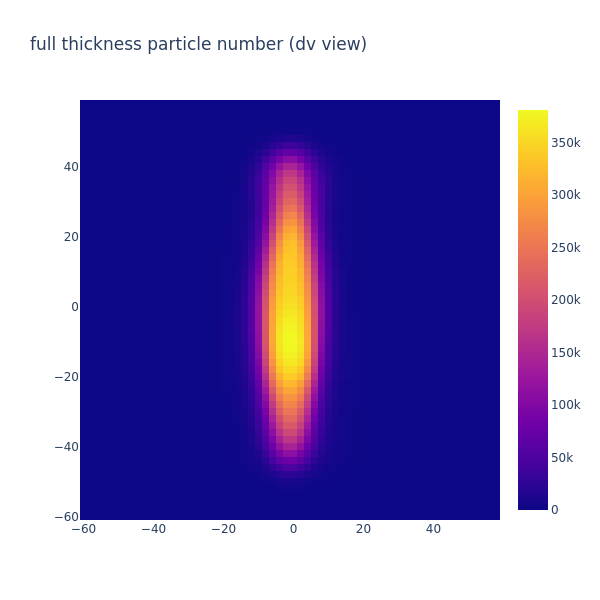

In [27]:
batch = "Sperm"

bfs = pd.read_pickle(arg_bfs_dv_ft_files[batch])
#bfs["density"].clip(upper=1).sum(axis=1).quantile(0.65)

data = bfs["density"].sum(axis=1)
fig = plot_figure_canvas(
    data.unstack(),
    square_size=60,
    step=2,
    fill=0
    )
fig.update_layout(
    title = "full thickness particle number (dv view)",
    height = 600,
    width = 600
)
fig.show(renderer= "png")